In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, cosine_similarity
from sklearn.preprocessing import StandardScaler
from rapidfuzz import process, fuzz





pd.set_option("display.max_columns", None)  
pd.set_option("display.max_rows", None)    
pd.set_option("display.width", None)      
pd.set_option("display.max_colwidth", None) 

In [13]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv("./data/song_data.csv")
df.dropna(inplace=True)
unpop_df = pd.read_csv("./data/unpop_song_data.csv")
unpop_df["Duration_min"] = unpop_df["Duration_ms"] / 60000
combined_og = pd.concat([df, unpop_df], ignore_index=True)
# We can see what the dataframe looks like by using the head function
df.head()
unpop_df.head()

,Danceability,Energy,key,Loudness,mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,explicit,popularity,Track,Artist,track_id,Duration_min
0,0.722,0.476,5,-8.203,1,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,220549,False,8,Este Corazón,El Javi,0Z4UqiPI5c4dMJ5iPyO61d,3.675817
1,0.955,0.281,0,-11.392,0,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,149543,True,0,thinking and doing,Br80,568FGhLEnSZhl82t0YmQ96,2.492383
2,0.753,0.355,8,-11.799,1,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,130019,True,0,Puzzlement,JpThaRuler,4Lex8QZVkptfw2PZtjoXlp,2.166983
3,0.650,0.331,3,-10.818,0,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,116193,True,0,Sensi,JpThaRuler,4pMqXl6EfmZrodPMYHUq9Z,1.936550
4,0.690,0.360,4,-15.624,0,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,111827,True,0,Rass,JpThaRuler,2pvQEKHtlkHb6ijMwcMuKV,1.863783


## Preprocessing the Dataset

Dropping Features

In [14]:


# Define your feature columns


# Fit the scaler on your full dataset

scaler = StandardScaler()

def clean_data_set(df, to_drop, to_use, to_scale):
    # Drop columns and filter desired features
    df = df.drop(columns=to_drop, errors='ignore')
    df = df[to_use]
    df = df.dropna()

    # Apply Standard Scaling
    df_scaled = df.copy()
    df_scaled[to_scale] = scaler.fit_transform(df_scaled[to_scale])

    return df_scaled




In [15]:
columns_to_use = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
                  'Instrumentalness', 'Liveness', 'Valence', 'Tempo',]

columns_to_drop = ['Artist','Track', 'Album', 'Album_type', 'Title', 'Channel', 'Licensed',
                   'official_video', 'most_playedon', 'Views', 'Likes', 'Comments',
                   'Stream', 'Duration_min', "EnergyLiveness"]

to_scale = ['Tempo', 'Loudness']


In [16]:
normalized_df = clean_data_set(df, columns_to_drop, columns_to_use, to_scale)
to_test_df = clean_data_set(unpop_df, [], columns_to_use, to_scale)
combined_df = pd.concat([normalized_df, to_test_df], ignore_index=True)

## Applying K-Means Clustering

In [17]:

kmeans = KMeans(n_clusters=4 , n_init='auto')
#kmeans.fit(normalized_df)
kmeans.fit(combined_df)
combined_og['Cluster'] = kmeans.labels_
#normalized_df['Cluster'] = kmeans.labels_
combined_df['Cluster'] = kmeans.labels_
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,Gorillaz - Rhinestone Eyes [Storyboard Film] (Official Music Video),Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,Gorillaz - New Gold ft. Tame Impala & Bootie Brown (Official Visualiser),Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


                          mean       std       min       max
Danceability      6.143407e-01  0.171190  0.000000  0.975000
Energy            6.204902e-01  0.223573  0.000020  1.000000
Loudness         -6.841837e-18  1.000020 -8.314766  1.856868
Speechiness       1.042760e-01  0.124575  0.000000  0.964000
Acousticness      2.973279e-01  0.294988  0.000000  0.996000
Instrumentalness  7.985441e-02  0.232697  0.000000  1.000000
Liveness          1.944663e-01  0.170344  0.014500  1.000000
Valence           5.199621e-01  0.251357  0.000000  0.993000
Tempo             4.057569e-16  1.000020 -4.078287  4.153489
[0.48501632 0.28829615]


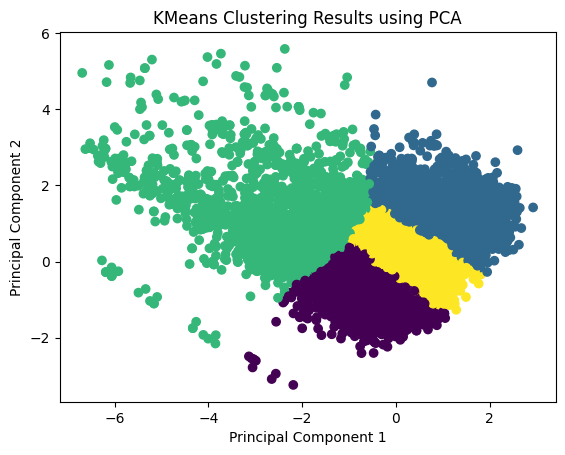

In [18]:
print(combined_df[columns_to_use].describe().T[['mean', 'std', 'min', 'max']])

pca = PCA(n_components=2)

pca.fit(combined_df)
print(pca.explained_variance_ratio_)


reduced_features = pca.fit_transform(combined_df.drop('Cluster', axis=1))
combined_df['pca_1'] = reduced_features[:, 0]
combined_df['pca_2'] = reduced_features[:, 1]


plt.scatter(combined_df['pca_1'], combined_df['pca_2'], c=combined_df['Cluster'], cmap='viridis')
plt.title('KMeans Clustering Results using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [19]:
unpop_df = unpop_df.merge(combined_og[['Artist', 'Track', 'Cluster']], on=['Artist', 'Track'], how='left')


In [20]:
def recommend_if_in_db_fuzzy(
    track_name,
    artist_name,
    song_db,
    n_recs=5,
    similarity_threshold=85
):
    import numpy as np
    from sklearn.metrics.pairwise import cosine_similarity
    from rapidfuzz import process, fuzz
    import re

    def clean_title(s):
        s = s.lower()
        s = re.sub(r"\(.*?\)", "", s)
        s = re.sub(r"[^a-z0-9\s]", "", s)
        s = re.sub(r"\s+", " ", s)
        return s.strip()

    # Build search key column if not already present
    if 'SearchKey' not in song_db.columns:
        song_db['SearchKey'] = (song_db['Track'] + " - " + song_db['Artist']).map(clean_title)

    query = clean_title(f"{track_name} - {artist_name}")
    choices = song_db['SearchKey'].tolist()

    best_match, score, match_idx = process.extractOne(query, choices, scorer=fuzz.token_sort_ratio)

    if score < similarity_threshold:
        print(f"No good match found for '{query}' (best score: {score})")
        return []

    match_row = song_db.iloc[match_idx]
    song_title = match_row['Track']
    artist_name = match_row['Artist']
    print(f"Found match: '{song_title}' by {artist_name} (score: {score})")

    # Recommendation logic continues...
    cluster = match_row['Cluster']
    candidates = unpop_df[unpop_df['Cluster'] == cluster].copy()

    vec = match_row[columns_to_use].values.reshape(1, -1)
    db_vecs = candidates[columns_to_use].values
    weights = np.array([1.0, 1.0, 0.8, 0.4, 0.6, 0.6, 0.4, 0.9, 0.8])
    vec_weighted = vec * weights
    db_vecs_weighted = db_vecs * weights
    similarities = cosine_similarity(vec_weighted, db_vecs_weighted).flatten()

    candidates['similarity'] = similarities
    top_matches = candidates[candidates['Track'] != song_title].nlargest(n_recs, 'similarity')

    return list(zip(top_matches['Track'], top_matches['Artist']))


In [21]:
track_name = input("Enter a track name: ")
artist_name = input("Enter an artist name: ")

recs = recommend_if_in_db_fuzzy(
    track_name=track_name,
    artist_name=artist_name,
    song_db=combined_og,
    n_recs=5
)
for i, (track, artist) in enumerate(recs, 1):
    print(f"{i}. {track} by {artist}")



Found match: 'Rooster (2022 Remaster)' by Alice In Chains (score: 100.0)
1. Yankee's White Whiskey by GrainFed
2. Just Me by Boxelder
3. Circa 2006 by Brightside
4. Asbury Park by Fox Teeth
5. When You're A Tuesday Girl by The Tuesdays
